In [74]:
import pandas as pd
import seaborn as sns

In [75]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [76]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 1.2 PreProcessing Data

In [77]:
# First we need to check do we have any null values in the dataset

In [78]:
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

In [79]:
# Four ways to handle data with null values if we have very small number of missing values.

#1)Replace the missing value with central tendency-Mean Median Mode
#2)Entire Row delete
#3)REspective to the problem ,have to replace the missing values
#4)Consider this as a semi supervised, create a model, so that we can predict the missing values.

In [80]:
#From the above we could see there is more data missing. So here we can use imputer to fill the missing values.
# For that first we need to split the quan and qual columns in the dataset.

In [81]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        if(dataset[columnName].dtype=='O'):
            qual.append(columnName)
        else:
            quan.append(columnName)
    return quan,qual

In [82]:
quan,qual=quanQual(dataset)
dataset[quan]

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0
3,4.0,56.00,52.00,52.00,66.0,59.43,NaN
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0


In [83]:
#By using Imputer Class we can fill the missing values 

# Here we are filling the missing Quan values with "mean" as the columns ssc,hsc,degree,etest,mba and salary all are in numbers.
# We cant replace them with "0" as it will change the meaning of the data
# Also we cannot delete these rows with null values as we can lose other useful data in other columns

import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataset[quan])
df=imp.transform(dataset[quan])
df = pd.DataFrame(df,columns = quan)

In [84]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000


In [85]:
cate=dataset[qual]

In [86]:
cate

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
212,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [87]:
cate.isnull().sum()

gender            2
ssc_b             2
hsc_b             2
hsc_s             2
degree_t          2
workex            2
specialisation    2
status            2
dtype: int64

In [88]:
#By using Imputer Class we can fill the missing values in Qual columns 

# Here we are filling the missing Qual values with "mode" (most_frequent) as the columns ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation and status are categorical data.
# We are using Mode as a strategy to fill the values as it will give the most repeated values.
# As the columns will have repeated values related to course and board , using Mode will not affect the data.

import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
imp.fit(cate)
df1=imp.transform(cate)
df1 = pd.DataFrame(df1,columns = qual)

In [89]:
df1

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
212,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [90]:
df.isnull().sum()

sl_no       0
ssc_p       0
hsc_p       0
degree_p    0
etest_p     0
mba_p       0
salary      0
dtype: int64

In [91]:
df1.isnull().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [92]:
#As we have preprocessed both the quan and qual data , we filled values in the missing places.
# Now we need to check whether we have an Outlier.


In [93]:
desc=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns= quan)
for columnName in quan:
    desc[columnName]["Mean"]=dataset[columnName].mean()
    desc[columnName]["Median"]=dataset[columnName].median()
    desc[columnName]["Mode"]=dataset[columnName].mode()[0]
    desc[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    desc[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    desc[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    #desc[columnName]["99%"]=np.percentile(dataset[columnName],99)
    desc[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    desc[columnName]["IQR"]=desc[columnName]["Q3:75%"]- desc[columnName]["Q1:25%"]
    desc[columnName]["1.5rule"]=1.5*desc[columnName]["IQR"]
    desc[columnName]["Lesser"]=desc[columnName]["Q1:25%"]-1.5*desc[columnName]["IQR"]
    desc[columnName]["Greater"]=desc[columnName]["Q3:75%"]+1.5*desc[columnName]["IQR"]
    desc[columnName]["Min"]=dataset[columnName].min()
    desc[columnName]["Max"]= dataset[columnName].max()
desc

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
Median,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Mode,1.0,62.0,63.0,65.0,60.0,56.7,300000.0
Q1:25%,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
Q2:50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Q3:75%,161.5,75.7,73.0,72.0,83.5,66.255,300000.0
Q4:100%,215.0,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,60000.0
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000.0
Lesser,-106.0,37.95,42.75,44.5,24.75,45.48,150000.0


In [94]:
lesser=[]
greater=[]

for columnName in quan:
    if(desc[columnName]["Min"]<desc[columnName]["Lesser"]):
        lesser.append(columnName)
    if(desc[columnName]["Max"]>desc[columnName]["Greater"]):
        greater.append(columnName)
    

In [95]:
lesser


['hsc_p']

In [96]:
greater

['hsc_p', 'degree_p', 'salary']

In [97]:
# Code to replace the outlier with lesser and greater values.
for columnName in lesser:
    dataset[columnName][dataset[columnName]<desc[columnName]["Lesser"]]=desc[columnName]["Lesser"]
    # dataset hsc_p (dataset_hsc_p<37.95)=37.95
for columnName in greater:
    dataset[columnName][dataset[columnName]>desc[columnName]["Greater"]]=desc[columnName]["Greater"]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19316\623500138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnName][dataset[columnName]<desc[columnName]["Lesser"]]=desc[columnName]["Lesser"]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19316\623500138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnName][dataset[columnName]>desc[columnName]["Greater"]]=desc[columnName]["Greater"]


In [98]:
desc=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns= quan)
for columnName in quan:
    desc[columnName]["Mean"]=dataset[columnName].mean()
    desc[columnName]["Median"]=dataset[columnName].median()
    desc[columnName]["Mode"]=dataset[columnName].mode()[0]
    desc[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    desc[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    desc[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    #desc[columnName]["99%"]=np.percentile(dataset[columnName],99)
    desc[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    desc[columnName]["IQR"]=desc[columnName]["Q3:75%"]- desc[columnName]["Q1:25%"]
    desc[columnName]["1.5rule"]=1.5*desc[columnName]["IQR"]
    desc[columnName]["Lesser"]=desc[columnName]["Q1:25%"]-1.5*desc[columnName]["IQR"]
    desc[columnName]["Greater"]=desc[columnName]["Q3:75%"]+1.5*desc[columnName]["IQR"]
    desc[columnName]["Min"]=dataset[columnName].min()
    desc[columnName]["Max"]= dataset[columnName].max()
desc

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.303395,66.334744,66.358558,72.100558,62.278186,277648.648649
Median,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Mode,1.0,62.0,63.0,65.0,60.0,56.7,300000.0
Q1:25%,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
Q2:50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Q3:75%,161.5,75.7,73.0,72.0,83.5,66.255,300000.0
Q4:100%,215.0,89.4,91.15,88.5,98.0,77.89,390000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,60000.0
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000.0
Lesser,-106.0,37.95,42.75,44.5,24.75,45.48,150000.0


In [99]:
#checking the processed data for outlier to proceed further
lesser=[]
greater=[]

for columnName in quan:
    if(desc[columnName]["Min"]<desc[columnName]["Lesser"]):
        lesser.append(columnName)
    if(desc[columnName]["Max"]>desc[columnName]["Greater"]):
        greater.append(columnName)
    

In [100]:
lesser

[]

In [101]:
greater

[]

In [102]:
# No Null values and no outlier now. 
# Now combining both and will create new datasheet.
two=[df,df1]
preprocessed=pd.concat(two,axis=1)
preprocessed

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [103]:
#Checking null values on preprocessed data
preprocessed.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [104]:
#saving the preprocessed data to new csv file
preprocessed.to_csv("PrePlacement_Data_Full_Class.csv",index=False)

# 1.3 Not Placed Students

In [105]:
#2) How many of them are not placed?
# To find this we can use Value counts. It will give the frequency of unique values 

In [106]:
dataset['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

# 1.4 Reason for Non placement

In [49]:
# 3)Find the reason for non placement from the dataset

In [170]:
placed = dataset[dataset['status'] == 'Placed']
not_placed = dataset[dataset['status'] == 'Not Placed']

In [171]:
comparison = dataset.groupby('status')[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean()
print(comparison)

                ssc_p      hsc_p   degree_p    etest_p      mba_p
status                                                           
Not Placed  57.544030  58.395522  61.134179  69.587910  61.612836
Placed      71.662579  69.878642  68.708936  73.222874  62.575376


In [ ]:

# Students who were not placed had lower average scores across all academics compared to placed students
# Major gaps in the Academics especially (ssc_p, hsc_p, and degree_p) for non placed students 

# 1.5  Relation between salary and mba_p

In [107]:
# 4)What kind of relation between salary and mba_p

In [129]:
# To find the relation between two columns we can use correlation
dataset.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19316\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.051550
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


In [111]:
# Relation Between mba_p and salary
#MBA and salary correlation is 0.14 (Positive correlation)
#Positive means directly proportional.If mba value increases salary will increase in 14%


# 1.6 minimum salary for specialization

In [112]:
 #5)Which specialization is getting minimum salary?

In [130]:
#groupby() --->> groups the Dataset by the 'specialisation' column.
min_salaries = dataset.groupby('specialisation')['salary'].min()

In [131]:
min_salaries

specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64

In [132]:
# Find the specialization with the overall minimum salary
# idxmin() gets the index (the specialization) corresponding to the overall minimum salary in min_salaries
min_spec = min_salaries.idxmin()
min_salary = min_salaries.min()
print(f"The Specialization getting minimum salary {min_spec} with the salary of {min_salary}")


The Specialization getting minimum salary Mkt&Fin with the salary of 200000.0


# 1.7 Above 500000 salary

In [133]:
#6)How many of them getting above 500000 salary?

In [134]:
# filtering salary column and assigning it to high_salary 
high_salary = dataset[dataset['salary'] > 500000]
#shape[0] will give the no. of rows in the high_salary
# Count the number of students
count = high_salary.shape[0]
count

3

In [ ]:
# 3 persons getting above 500000 salary in the dataset.

# 1.8 Hypothesis Testing

In [ ]:
#  7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [126]:
dataset=pd.read_csv("PrePlacement_Data_Full_Class.csv")
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [136]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [127]:
# Here we are using oneway ANAVO 
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=100.49298790500407, pvalue=2.101472592739362e-21)

In [ ]:
#Conclusion

#if pvalue is < 0.05 we reject Null hypothesis
#if pvalue is > 0.05 we accept Null hypothesis
#Here pvalue - 2.10e-21 which is < than 0.05 ---> we are rejecting Null hypothesis
#hence there is significant difference between etest and mba marks of students 

# 1.9 Similarity between Degree Specialization wrt Salary

In [ ]:
# 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%
#.(Make decision using Hypothesis Testing)

In [ ]:
#degree_t(Sci&Tech) and specialisation(Mkt&HR) student -Salary
#Different group same condition
#Independednt Sample - Unpaired Ttest

In [137]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
degre= dataset[dataset['degree_t']=='Sci&Tech']['salary']
special= dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degre, special)

TtestResult(statistic=2.774724236760964, pvalue=0.006218437705806388, df=152.0)

In [ ]:
#if pvalue is < 0.05 we reject Null hypothesis
#if pvalue is > 0.05 we accept Null hypothesis
#Here pvalue - 0.00 which is < than 0.05 ---> we are rejecting Null hypothesis
#hence there is significant difference between degree_t(Sci&Tech) and specialisation(Mkt&HR) student with respect to Salary

# 1.10 Converting Normal distribution to Std Normal distribution

In [ ]:
#9)Convert the normal distribution to standard normal distribution for salary column

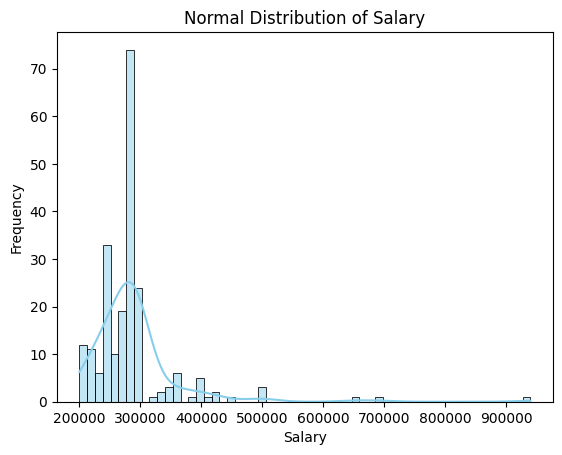

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(dataset["salary"],kde=True, color='skyblue')

# Displaying the Normal Distribution of salary
plt.title("Normal Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

1.749752416690339e-16

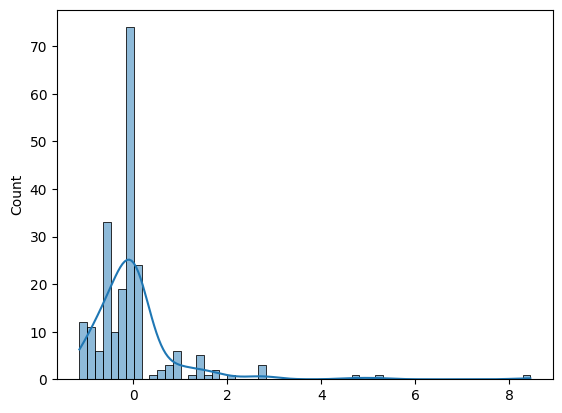

In [145]:
# Coverted to standard Normal Distribution

mean=dataset["salary"].mean()
std=dataset["salary"].std()
values=[i for i in dataset["salary"]]
z_score=[((j-mean)/std) for j in values]
sns.histplot(z_score,kde=True)
sum(z_score)/len(z_score)


# 1.11 Probability Density Function

In [ ]:
#10)What is the probability Density Function of the salary range from 700000 to 900000?

Mean=288655.405, Standard Deviation=77098.465
The area between range(700000,900000):4.7691121845480285e-08


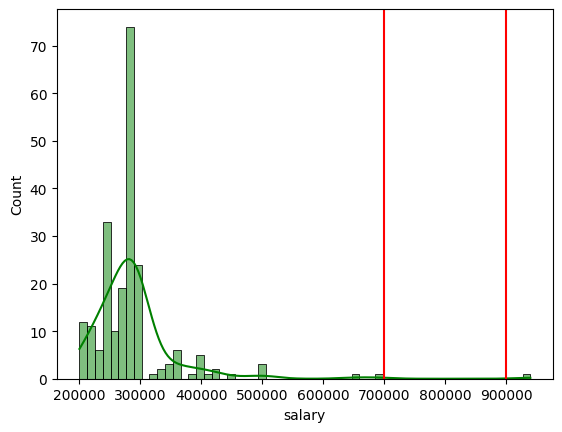

In [148]:
from matplotlib import pyplot
from scipy.stats import norm
ax = sns.histplot(dataset["salary"],kde=True,color='Green')
pyplot.axvline(700000,color='Red')
pyplot.axvline(900000,color='Red')
# generate a sample
sample = dataset["salary"]
# calculate parameters
sample_mean =sample.mean()
sample_std = sample.std()
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
# define the distribution
dist = norm(sample_mean, sample_std)
    
# sample probabilities for a range of outcomes
values = [value for value in range(700000, 900000)]
probabilities = [dist.pdf(value) for value in values]    
prob=sum(probabilities)
print("The area between range({},{}):{}".format(700000,900000,sum(probabilities)))

In [ ]:
#The area under the curve between 700,000 and 900,000 is nearly zero indicating that such salary is nonexistent in this dataset.

# 1.12 Similarity between degree_t(Sci&Tech)with respect to etest_p and mba_p 

In [ ]:
#11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing

In [ ]:
#Group - degree_t(Sci&Tech) with mba_p and etest_p
#Same group different condition
#Dependednt Sample - Paired Ttest

In [150]:
from scipy.stats import ttest_rel
deg = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
deg1 = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
ttest_rel(deg, deg1)

TtestResult(statistic=-5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

In [ ]:
#if pvalue is < 0.05 we reject Null hypothesis
#if pvalue is > 0.05 we accept Null hypothesis
#Here pvalue - 5.51e-06 which is < than 0.05 ---> we are rejecting Null hypothesis ----->accepting Alternate Hypothesis
#hence there is significant difference between MBA mark and Entrance test mark of students in degree_t(Sci&Tech) group

# 1.13 Correlation of Salary

In [ ]:
# 12)Which parameter is highly correlated with salary?

In [151]:
dataset.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19316\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.051550
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


In [ ]:
# By seeing the above table we can conclude that etest_p has 0.15 as correlation coefficient.
# etest_p is highly correlated with salary 

# 1.14 Any Graph -- ScatterPlot 

In [152]:
#13) plot any useful graph and explain it

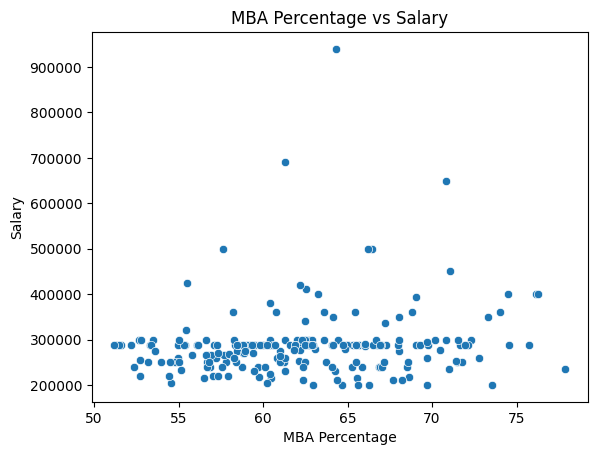

In [169]:
sns.scatterplot(x='mba_p', y='salary', data=dataset)
plt.title("MBA Percentage vs Salary")
plt.xlabel("MBA Percentage")
plt.ylabel("Salary")
plt.show()

In [ ]:
#ScatterPlot
#A scatterplot is a great way to visualize the relationship between two continuous (numeric) variables. In data science, it's commonly used to 
# identify trends, patterns, correlations between variables.

#Explanation
# This is a scatter plot which shows the relationship between mba mark and salary
# The points are widely scattered shows that it is not much related . Meaning MBA mark has no influence on salary.
# There is no clear trend showing that there is no correlatioin between mba and salary
# Many people scored between 50 to 75 but in that one or two person got salary above 700000
# Salary offered is not based on MBA mark here.
# Majority of the students got salary between 200000 and 300000.
# student who got 50% in mba and 75% in mba --> both category students got salary between 2l - 3L
